# Round 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests

## Prepare data

In [6]:
def wrangle_backtest(content_input):
    ts_start = [content_input.index(x) for x in content_input if 'Trade History' in x][0]
    sandbox_log = [content_input.index(x) for x in content_input if 'Sandbox logs' in x][0]
    al_history = [content_input.index(x) for x in content_input if 'Activities log' in x][0]
    
    sandbox = content_input[sandbox_log+1:al_history-3]
    sandbox = [x.strip() for x in sandbox]
    json_string = "[" + "".join(sandbox).replace("}{", "},{") + "]"
    sandbox_logs = pd.DataFrame(json.loads(json_string))

    activity_logs = content_input[al_history+1:ts_start-4]
    df = pd.DataFrame(activity_logs)[0].str.strip(). str.split(';', expand=True)
    df.columns = df.loc[0]
    activity_logs_df = df.iloc[1:]

    trades = content_input[ts_start+1:]
    json_str = "".join(trades)
    json_str = json_str.replace(",\n  }", "\n  }") 
    json_str = json_str.replace(",\n]", "\n]")  
    data = json.loads(json_str)
    trades_df = pd.DataFrame(data)

    return trades_df, activity_logs_df, sandbox_logs
    

In [10]:
# Read data: round5
url = "https://raw.githubusercontent.com/antek0308/IMC_strategy_prep/main/data/round5.log"
response = requests.get(url)
content = response.text.splitlines()

# Cleaning data
trades_df, activity_logs_df, sandbox_logs = wrangle_backtest(content)


In [11]:
print("Trade History:")
display(trades_df.head(10))

print("Activities Log Data:")
display(activity_logs_df.head(10))

print("Sandbox Logs Data:")
display(sandbox_logs.head(10))

Trade History:


,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,Vinnie,SUBMISSION,GIFT_BASKET,SEASHELLS,69790,2
1,0,Vladimir,SUBMISSION,COCONUT_COUPON,SEASHELLS,581,19
2,0,Valentina,SUBMISSION,COCONUT_COUPON,SEASHELLS,581,24
3,0,Vinnie,SUBMISSION,COCONUT_COUPON,SEASHELLS,581,2
4,100,Vinnie,SUBMISSION,COCONUT_COUPON,SEASHELLS,580,1
5,100,Vladimir,SUBMISSION,COCONUT_COUPON,SEASHELLS,580,18
6,100,SUBMISSION,Vinnie,AMETHYSTS,SEASHELLS,10000,5
7,100,Valentina,SUBMISSION,COCONUT_COUPON,SEASHELLS,580,20
8,100,Remy,Vinnie,STARFRUIT,SEASHELLS,4876,1
9,100,Vinnie,SUBMISSION,GIFT_BASKET,SEASHELLS,69788,7


Activities Log Data:


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,5,0,GIFT_BASKET,69790,2,69789,19,69788,24,69801,2,69802,19,69803,24,69795.5,0.0
2,5,0,COCONUT_COUPON,581,45,,,,,582,45,,,,,581.5,0.0
3,5,0,CHOCOLATE,7957,37,7956,92,,,7958,129,,,,,7957.5,0.0
4,5,0,AMETHYSTS,9998,3,9996,2,9995,20,10004,2,10005,20,,,10001.0,0.0
5,5,0,ROSES,13720,63,,,,,13721,63,,,,,13720.5,0.0
6,5,0,STARFRUIT,4871,22,,,,,4877,22,,,,,4874.0,0.0
7,5,0,STRAWBERRIES,3978,199,,,,,3980,199,,,,,3979.0,0.0
8,5,0,COCONUT,9862,133,9861,47,,,9863,133,9864,47,,,9862.5,0.0
9,5,0,ORCHIDS,1084,6,1083,4,1076,45,1093,6,1094,4,1102,45,1088.5,0.0
10,5,100,AMETHYSTS,9998,6,9996,1,9995,27,10000,5,10004,1,10005,27,9999.0,0.0


Sandbox Logs Data:


,sandboxLog,lambdaLog,timestamp
0,,"[[0,"""",[[""COCONUT"",""COCONUT"",1],[""STARFRUIT"",""...",0
1,,"[[100,""{\""AMETHYSTS\"":[false],\""STARFRUIT\"":[f...",100
2,,"[[200,""{\""AMETHYSTS\"":[false,false],\""STARFRUI...",200
3,,"[[300,""{\""AMETHYSTS\"":[false,false,false],\""ST...",300
4,,"[[400,""{\""AMETHYSTS\"":[false,false,false,false...",400
5,,"[[500,""{\""AMETHYSTS\"":[false,false,false,false...",500
6,,"[[600,""{\""AMETHYSTS\"":[false,false,false,false...",600
7,,"[[700,""{\""AMETHYSTS\"":[false,false,false,false...",700
8,,"[[800,""{\""AMETHYSTS\"":[false,false,false,false...",800
9,,"[[900,""{\""AMETHYSTS\"":[false,false,false,false...",900


In [5]:
# Product types from trade history
trade_products = trades_df['symbol'].unique()
print("Product types from trade history:", trade_products)

# Product types from activities log
activitylogs_products = activity_logs_df['product'].unique()
print("Product types from activities log", activitylogs_products)


Product types from trade history: ['GIFT_BASKET' 'COCONUT_COUPON' 'AMETHYSTS' 'STARFRUIT' 'CHOCOLATE'
 'STRAWBERRIES' 'COCONUT' 'ROSES' 'ORCHIDS']
Product types from activities log ['GIFT_BASKET' 'COCONUT_COUPON' 'CHOCOLATE' 'AMETHYSTS' 'ROSES'
 'STARFRUIT' 'STRAWBERRIES' 'COCONUT' 'ORCHIDS']


This dataset contains **9** types of trading products.


## Data Analysis by Product Category

### Transaction frequency 

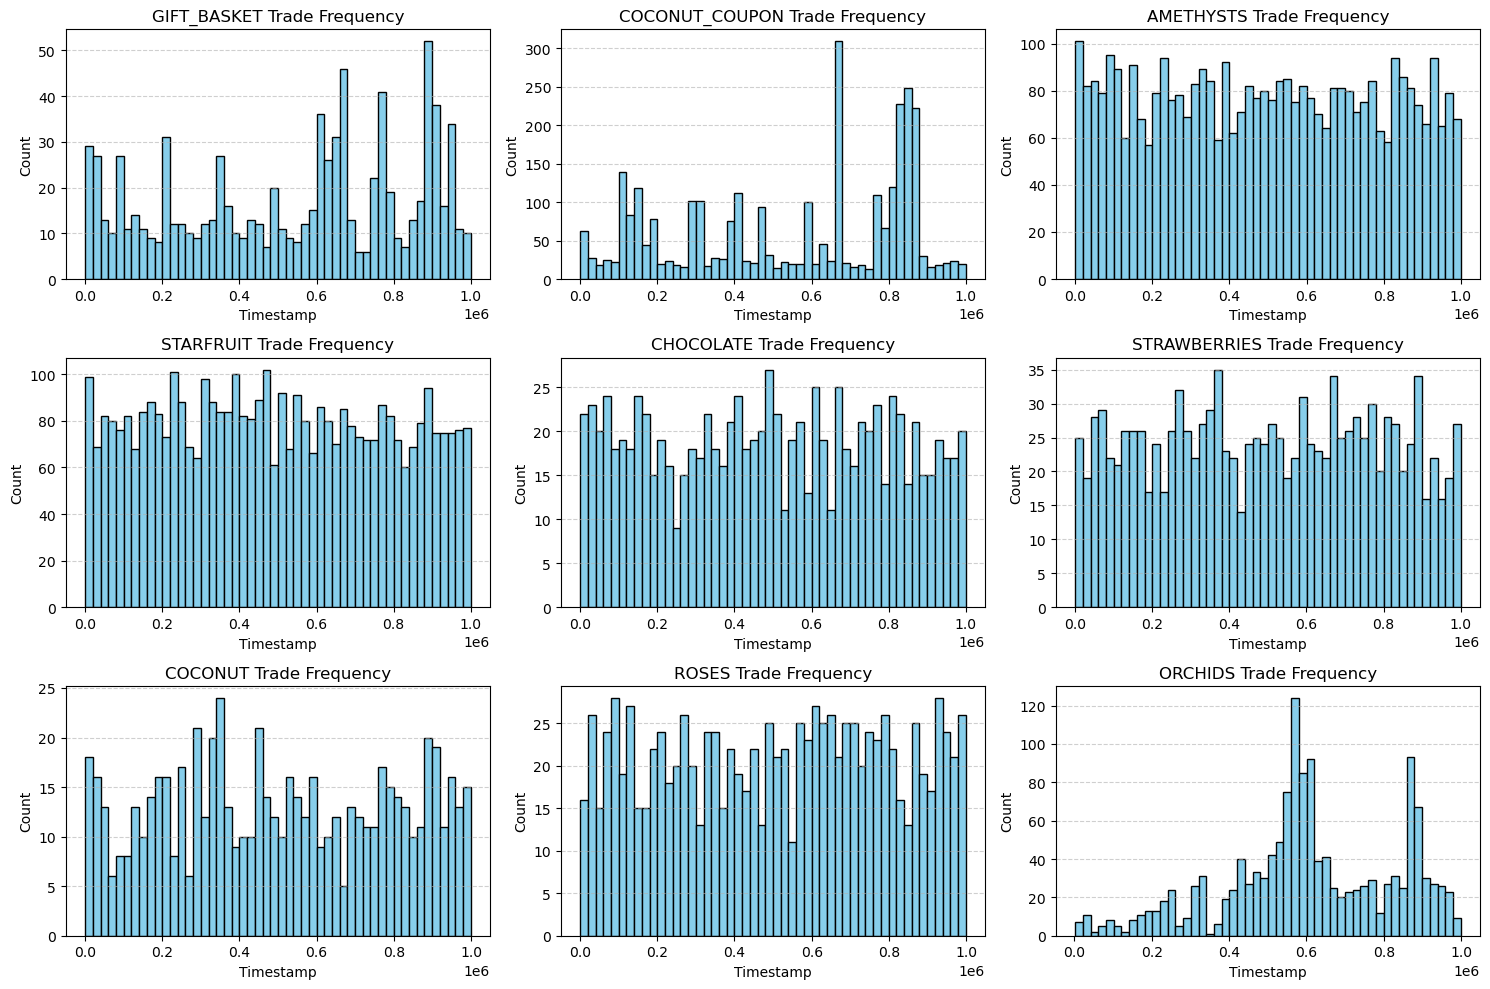

In [5]:
products = trades_df["symbol"].unique()
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  
axes = axes.flatten()  

for i, product in enumerate(products):
    product_trades = trades_df[trades_df["symbol"] == product]
    axes[i].hist(product_trades["timestamp"], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f"{product} Trade Frequency")
    axes[i].set_xlabel("Timestamp")
    axes[i].set_ylabel("Count")
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


**ORCHIDS** shows a sharp increase in trading volume mid-session.

**AMETHYSTS** and **STARFRUIT** maintain consistently high transaction levels throughout.

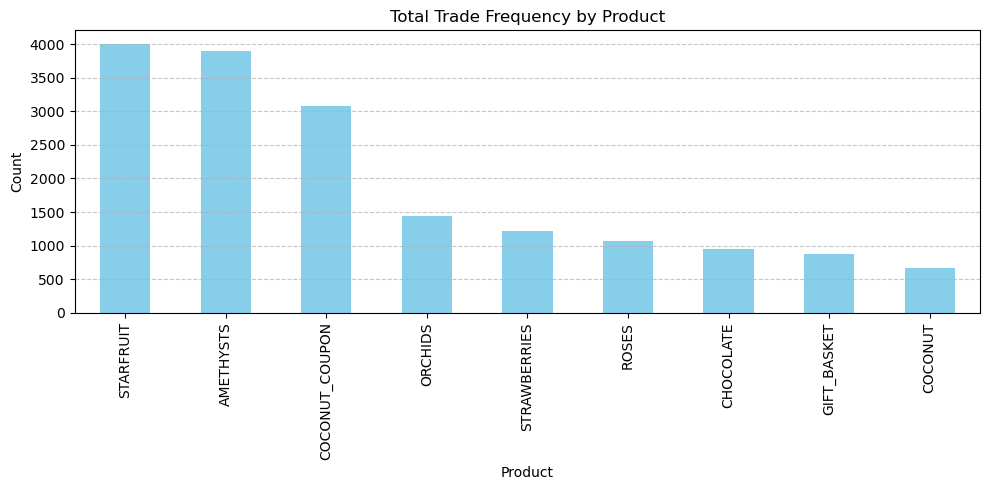

In [6]:
# Total number of transactions per product
trade_counts = trades_df['symbol'].value_counts()

plt.figure(figsize=(10, 5))
trade_counts.plot(kind='bar', color='skyblue')
plt.title('Total Trade Frequency by Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**STARFRUIT** and **AMETHYSTS** as the two busiest markets.

**COCONUT** and **GIFT_BASKET** see less than a quarter of that activity.

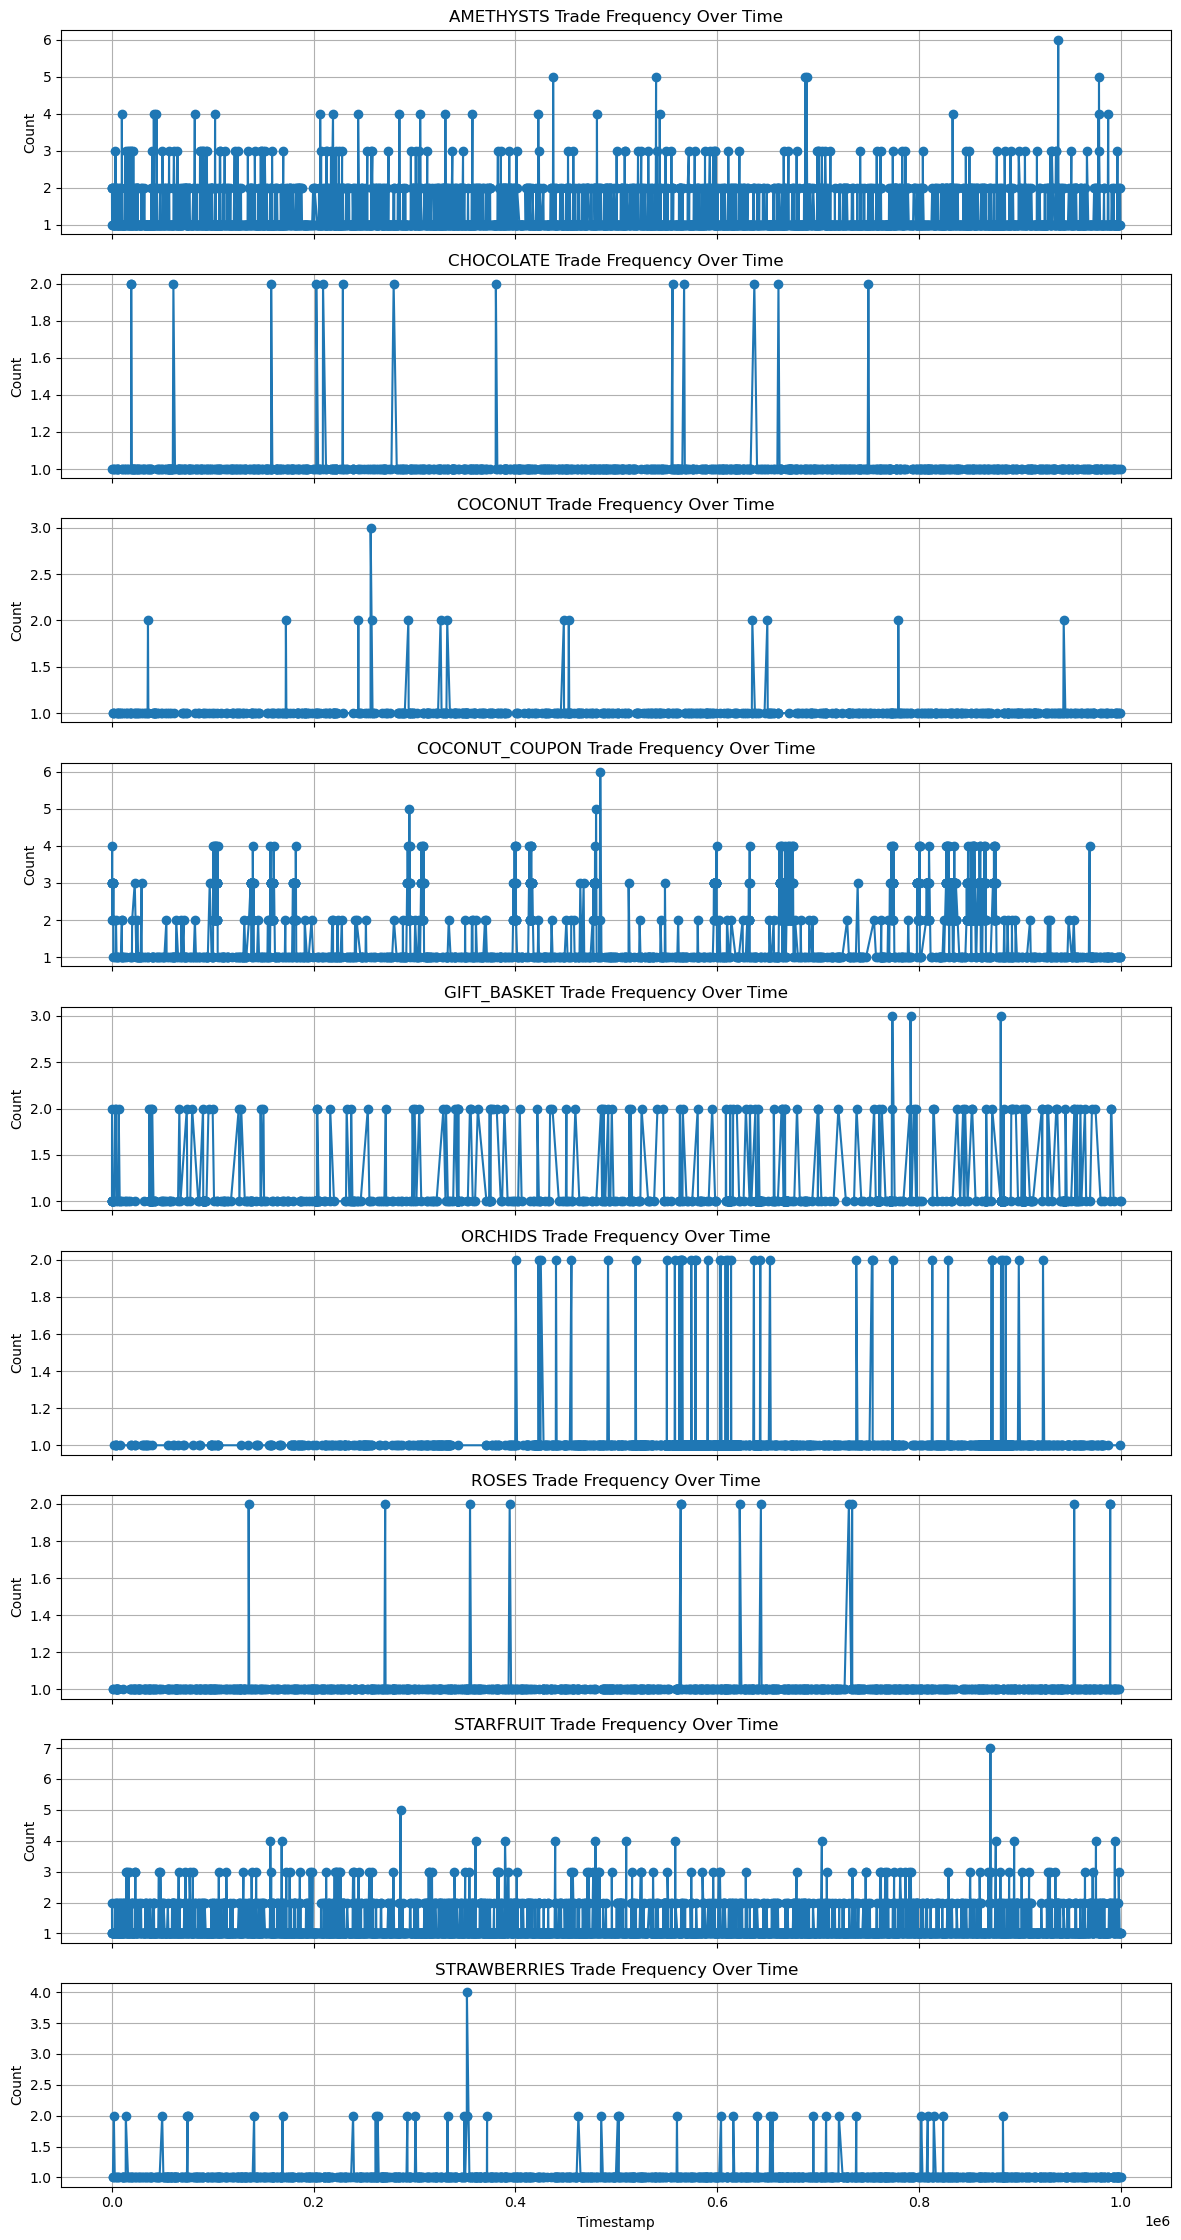

In [7]:
# Find out when high-frequency trading takes place
def plot_high_frequency_windows(trades_df: pd.DataFrame, bin_width: int = 100):
    trades_df = trades_df.copy()
    trades_df['time'] = (trades_df['timestamp'])
    trade_counts = trades_df.groupby(['symbol', 'time']).size().reset_index(name='trade_count')

    products = trade_counts['symbol'].unique()
    num_products = len(products)
    fig, axes = plt.subplots(num_products, 1, figsize=(12, 2.5 * num_products), sharex=True)

    for i, product in enumerate(products):
        product_data = trade_counts[trade_counts['symbol'] == product]
        axes[i].plot(product_data['time'], product_data['trade_count'], marker='o', linestyle='-')
        axes[i].set_title(f'{product} Trade Frequency Over Time')
        axes[i].set_ylabel('Count')
        axes[i].grid(True)

    plt.xlabel('Timestamp')
    plt.tight_layout()
    plt.show()
    
plot_high_frequency_windows(trades_df, bin_width=100)


**GIFT_BASKET** and **ORCHIDS** show more clustered and sustained bursts of trading.

**COCONUT** and **STRAWBERRIES** show sparse, isolated activity.

### Price Trends

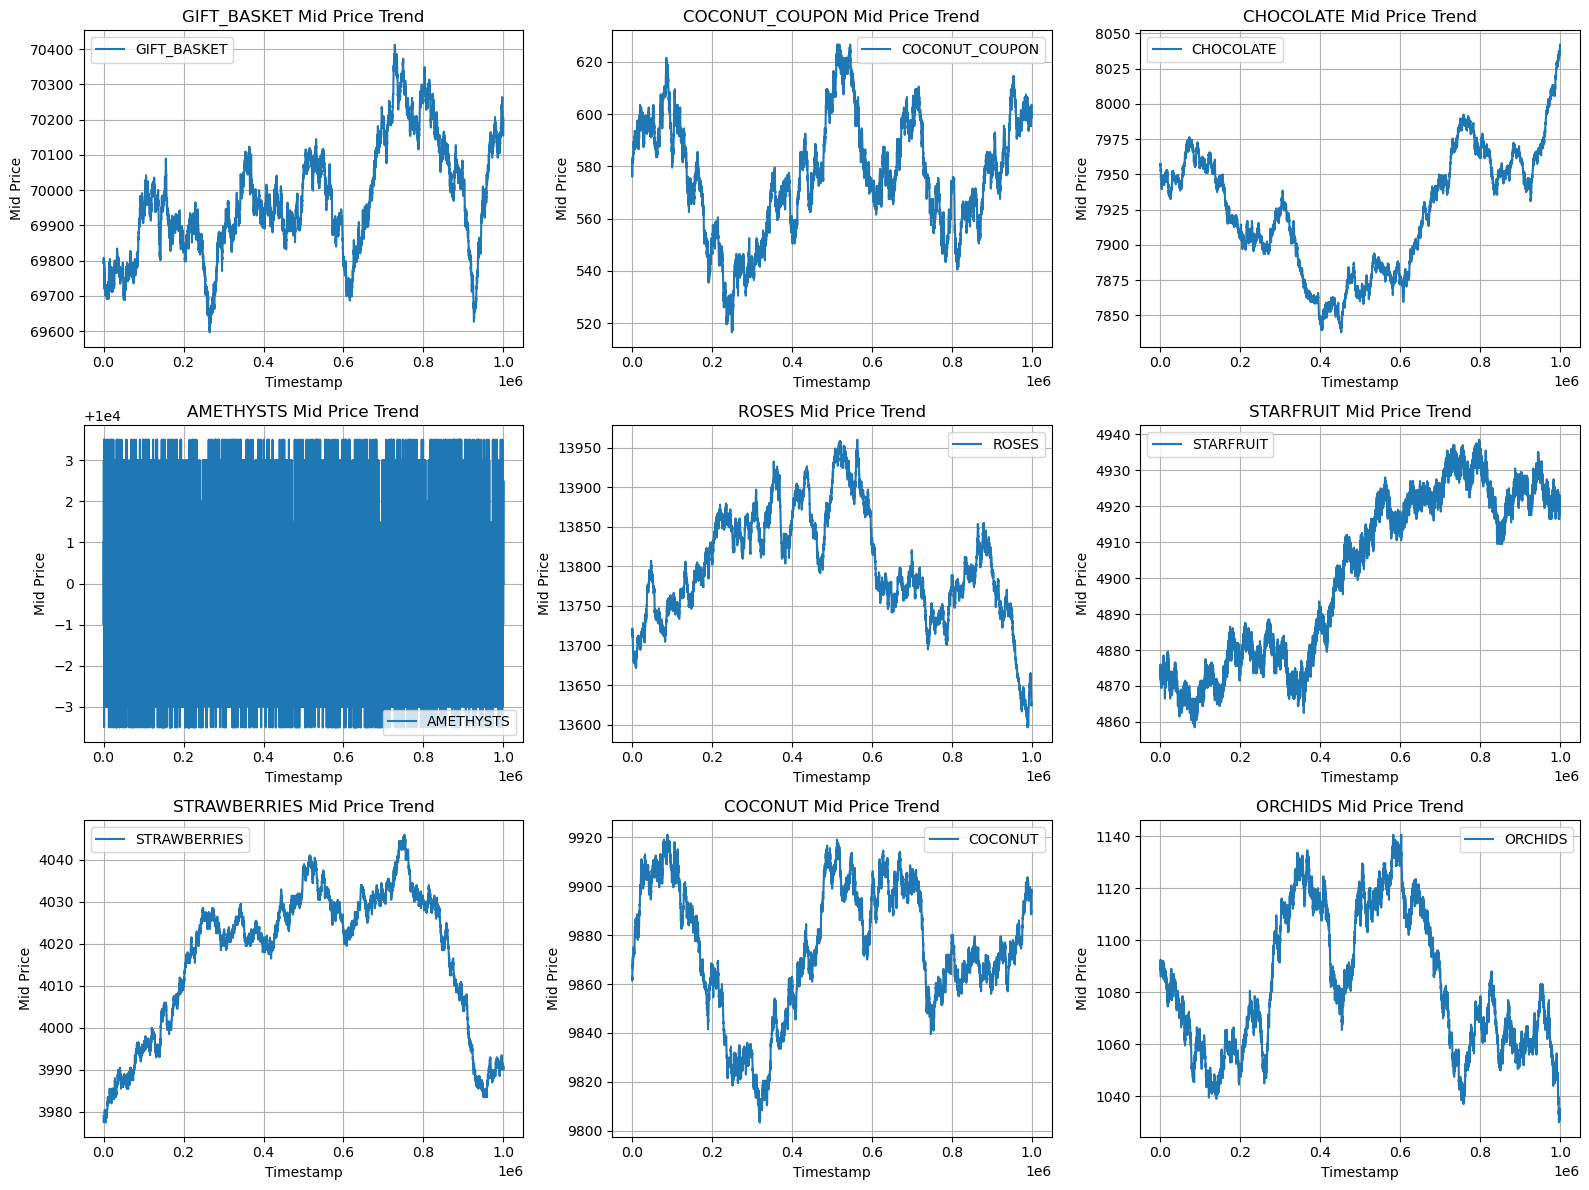

In [8]:
products = activity_logs_df["product"].unique()
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, product in enumerate(products):
    df_product = activity_logs_df[activity_logs_df["product"] == product].copy()
    df_product["mid_price"] = pd.to_numeric(df_product["mid_price"], errors="coerce")
    df_product["timestamp"] = pd.to_numeric(df_product["timestamp"], errors="coerce")
    df_product = df_product.dropna(subset=["timestamp", "mid_price"])
    axes[i].plot(df_product["timestamp"], df_product["mid_price"], label=product)
    axes[i].set_title(f"{product} Mid Price Trend")
    axes[i].set_xlabel("Timestamp")
    axes[i].set_ylabel("Mid Price")
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()


**GIFT_BASKET** display strong directional movements, while **AMETHYSTS** data seems abnormally.

### Buyer and seller behavior

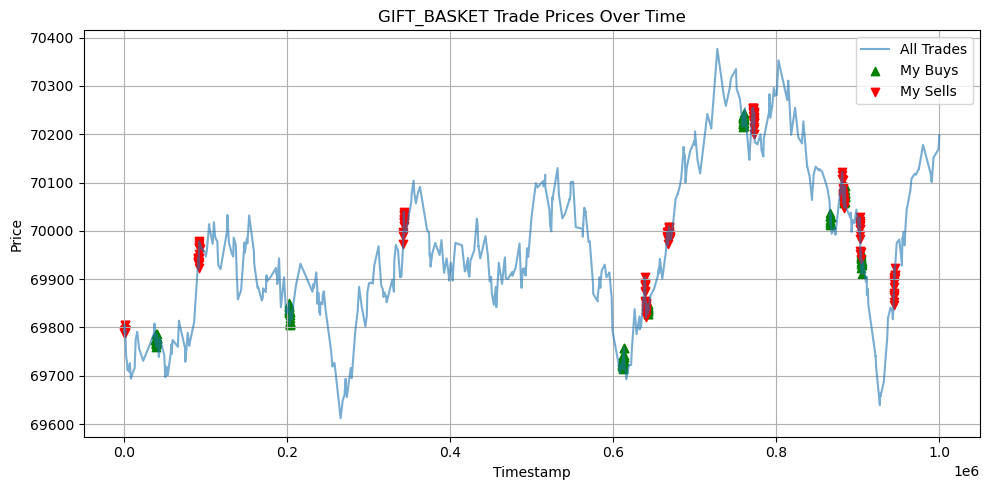

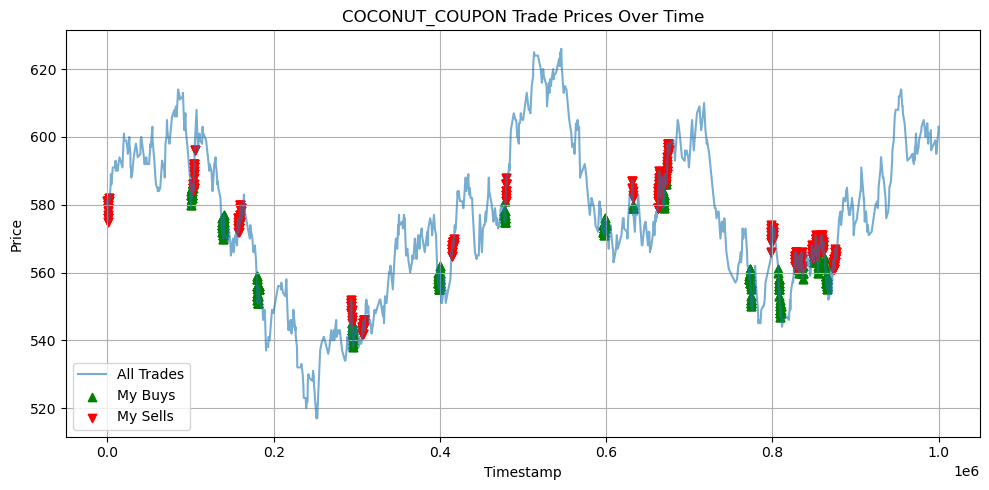

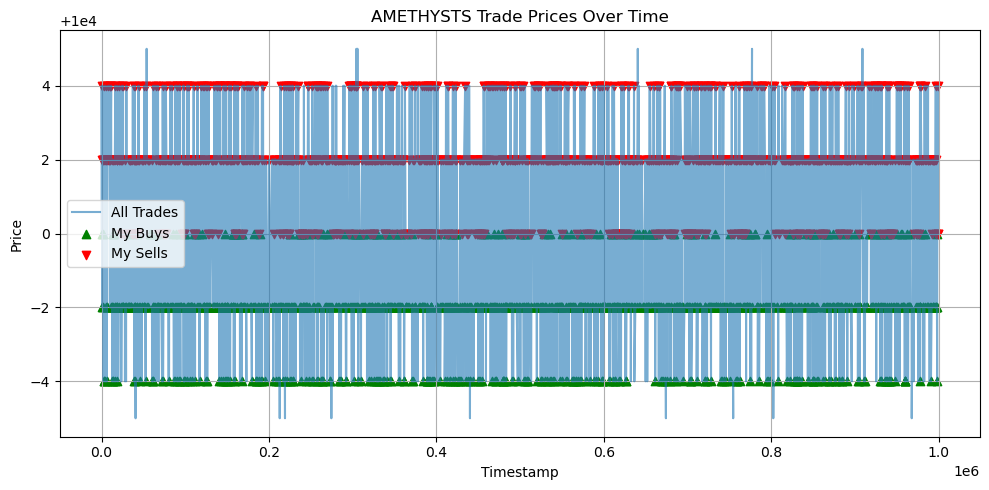

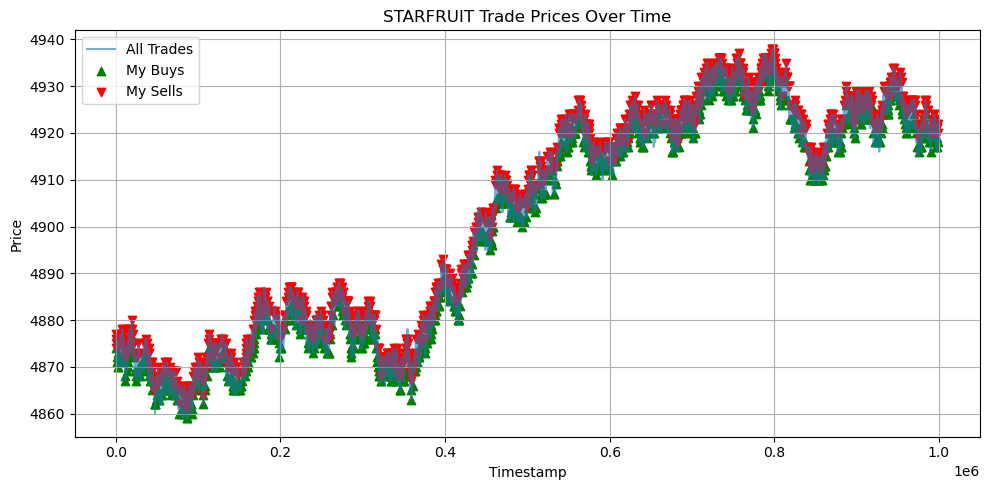

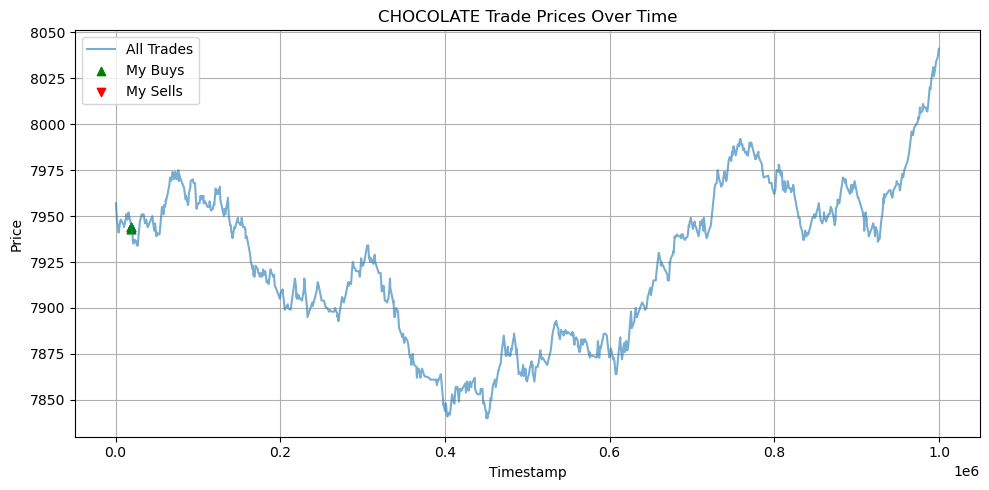

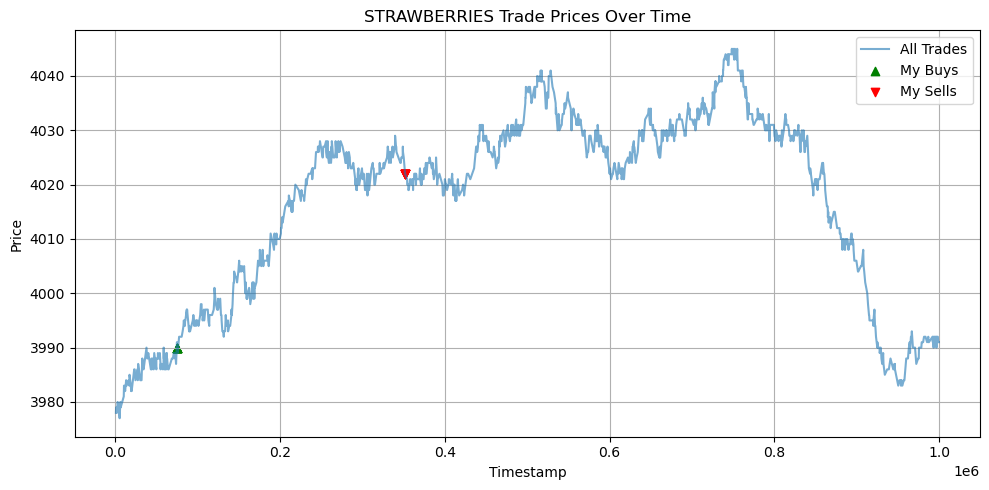

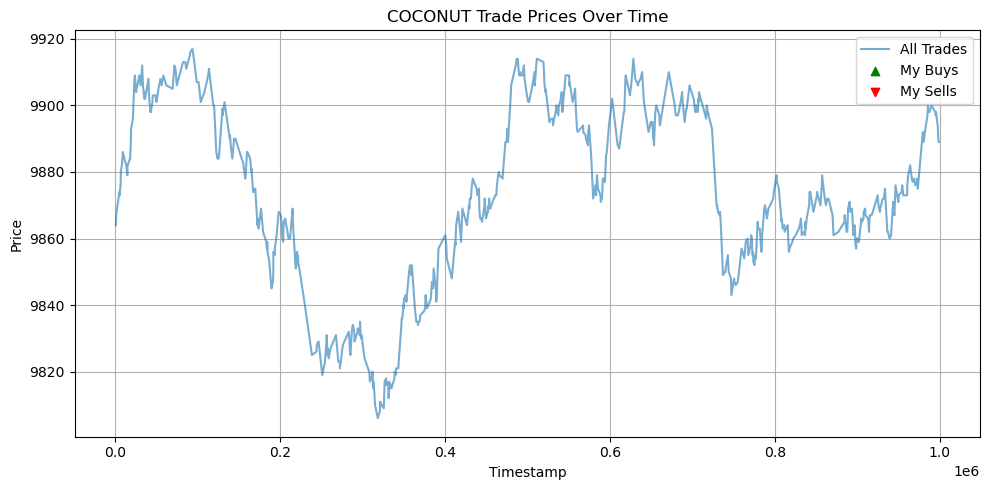

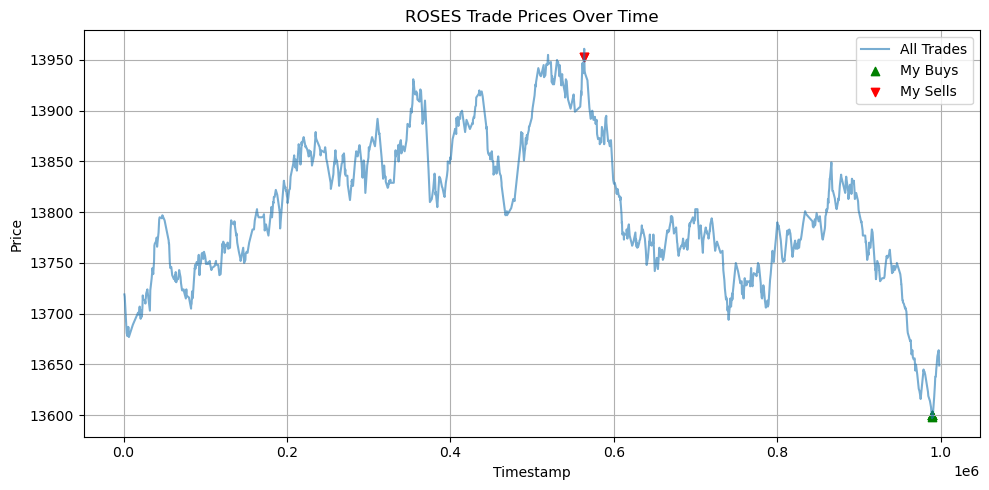

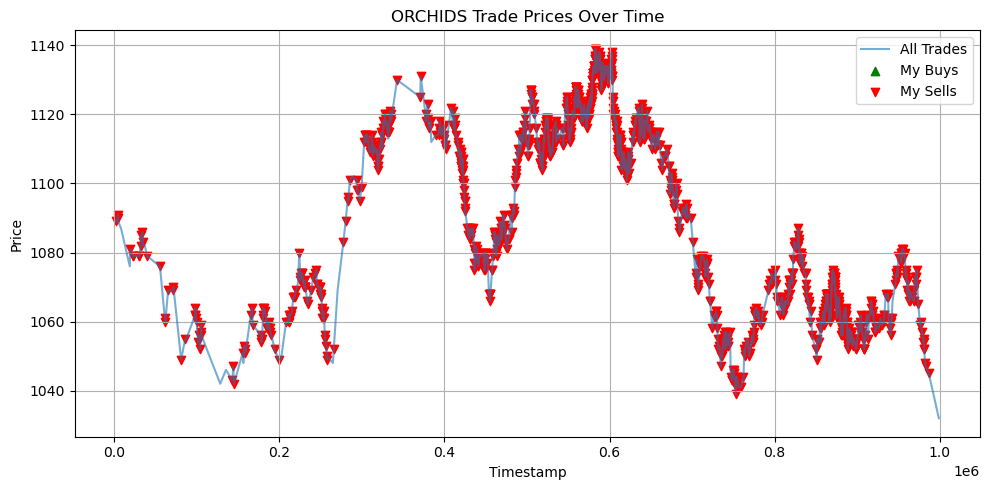

,Product,Total Trades,My Buys,My Sells,Other Trades
0,GIFT_BASKET,880,138,182,560
1,COCONUT_COUPON,3085,999,1081,1005
2,AMETHYSTS,3894,1293,1277,1324
3,STARFRUIT,4009,1141,1437,1431
4,CHOCOLATE,946,5,0,941
5,STRAWBERRIES,1223,5,7,1211
6,COCONUT,660,0,0,660
7,ROSES,1064,5,2,1057
8,ORCHIDS,1442,0,1393,49


In [9]:
products = trades_df["symbol"].unique()
summary_list = []

for product in products:
    trades = trades_df[trades_df["symbol"] == product]
    my_buys = trades[trades["buyer"] == "SUBMISSION"]
    my_sells = trades[trades["seller"] == "SUBMISSION"]
    others = trades[(trades["buyer"] != "SUBMISSION") & (trades["seller"] != "SUBMISSION")]

    plt.figure(figsize=(10, 5))
    plt.plot(trades["timestamp"], trades["price"], label="All Trades", alpha=0.6)
    plt.scatter(my_buys["timestamp"], my_buys["price"], color='green', marker='^', label="My Buys")
    plt.scatter(my_sells["timestamp"], my_sells["price"], color='red', marker='v', label="My Sells")
    plt.title(f"{product} Trade Prices Over Time")
    plt.xlabel("Timestamp")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    summary_list.append({
        "Product": product,
        "Total Trades": len(trades),
        "My Buys": len(my_buys),
        "My Sells": len(my_sells),
        "Other Trades": len(others)
    })

summary_df = pd.DataFrame(summary_list)
summary_df

Most trades were concentrated in **STARFRUIT** and **AMETHYSTS**, where the user engaged frequently. 

**GIFT_BASKET** and **COCONUT_COUPON** show more selective trading, with clearer buy/sell timing visible. 

The summary table highlights that some products (e.g., **CHOCOLATE**, **COCONUT**) had no executed trades by the user.

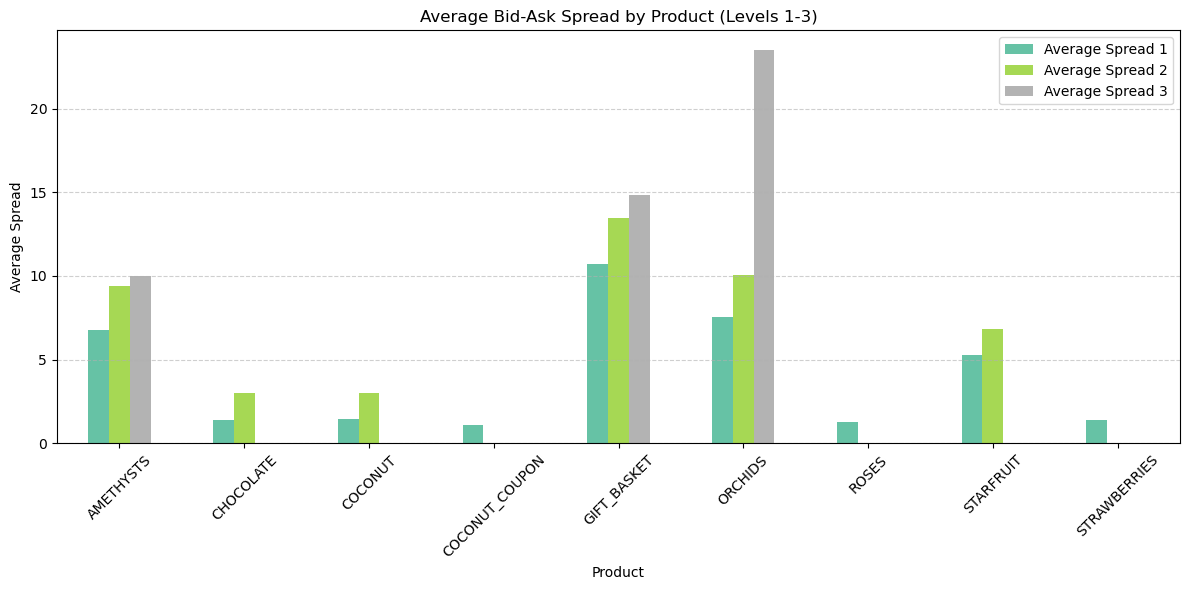

          Product  Average Spread 1  Average Spread 2  Average Spread 3
0       AMETHYSTS            6.7443          9.405827         10.000000
1       CHOCOLATE            1.3830          3.000000               NaN
2         COCONUT            1.4625          3.000000               NaN
3  COCONUT_COUPON            1.0779               NaN               NaN
4     GIFT_BASKET           10.7403         13.467700         14.868718
5         ORCHIDS            7.5389         10.048400         23.520700
6           ROSES            1.2759               NaN               NaN
7       STARFRUIT            5.2600          6.837703               NaN
8    STRAWBERRIES            1.3837               NaN               NaN


In [10]:
# Average Spread of each product
for level in [1, 2, 3]:
    activity_logs_df[f'bid_price_{level}'] = pd.to_numeric(activity_logs_df[f'bid_price_{level}'], errors='coerce')
    activity_logs_df[f'ask_price_{level}'] = pd.to_numeric(activity_logs_df[f'ask_price_{level}'], errors='coerce')
    activity_logs_df[f'spread_{level}'] = activity_logs_df[f'ask_price_{level}'] - activity_logs_df[f'bid_price_{level}']

spread_summary = activity_logs_df.groupby('product')[[f'spread_{level}' for level in [1, 2, 3]]].mean().reset_index()
spread_summary.columns = ['Product', 'Average Spread 1', 'Average Spread 2', 'Average Spread 3']

spread_summary.set_index('Product').plot(kind='bar', figsize=(12, 6), colormap='Set2')

plt.title('Average Bid-Ask Spread by Product (Levels 1-3)')
plt.xlabel('Product')
plt.ylabel('Average Spread')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print(spread_summary)


**ORCHIDS** and **GIFT_BASKET** show significantly wider spreads (especially at Level 3) indicating lower liquidity or higher transaction costs.

**COCONUT_COUPON**, **ROSES**, and **STRAWBERRIES** maintain very tight spreads, making them more suitable for precision trading. 

### Evaluate profit and loss

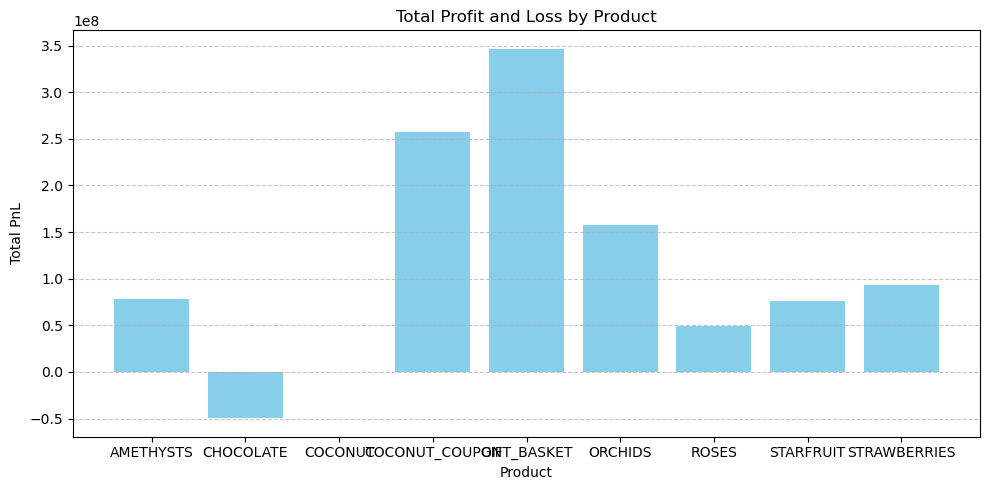

In [11]:
products = activity_logs_df['product'].unique()
activity_logs_df['profit_and_loss'] = pd.to_numeric(activity_logs_df['profit_and_loss'], errors='coerce')
activity_logs_df['timestamp'] = pd.to_numeric(activity_logs_df['timestamp'], errors='coerce')

product_pnl = activity_logs_df.groupby('product')['profit_and_loss'].sum().reset_index()
product_pnl.columns = ['product', 'total_pnl']

plt.figure(figsize=(10, 5))
plt.bar(product_pnl['product'], product_pnl['total_pnl'], color='skyblue')
plt.title("Total Profit and Loss by Product")
plt.xlabel("Product")
plt.ylabel("Total PnL")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


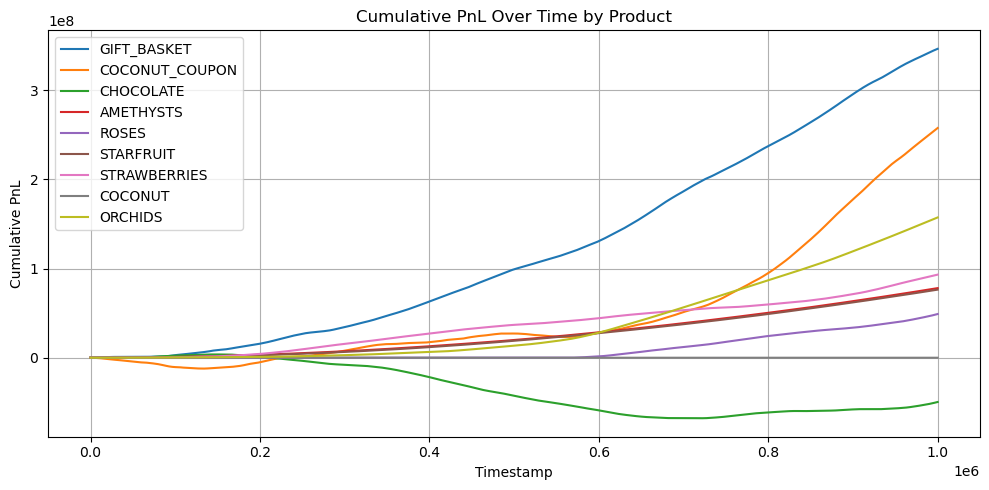

In [12]:
# Cumulative Pnl of each product over time
plt.figure(figsize=(10, 5)) 

for product in products:
    df_product = activity_logs_df[activity_logs_df['product'] == product].copy()
    df_product = df_product.dropna(subset=['timestamp', 'profit_and_loss'])
    df_product['cumulative_pnl'] = df_product['profit_and_loss'].cumsum()
    
    plt.plot(df_product['timestamp'], df_product['cumulative_pnl'], label=product)

plt.title("Cumulative PnL Over Time by Product")
plt.xlabel("Timestamp")
plt.ylabel("Cumulative PnL")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The product **GIFT_BASKET** achieved the **highest** total profit and most consistent upward cumulative PnL trend over time, indicating strong and stable performance.

**COCONUT_COUPON** and **ORCHIDS** also delivered significant long-term gains despite some early fluctuations.

In contrast, **CHOCOLATE** showed persistent losses, while **ROSES** had limited profit growth.

### Calculating VWAP (Volume Weighted Average Price)


 VWAP values for GIFT_BASKET:

0   timestamp      VWAP_1        VWAP_2        VWAP_3
1           0  69795.5000  69795.500000  69795.500000
14        100  69788.7500  69794.421053  69789.842105
26        200  69806.9375  69806.470588           NaN
36        300  69807.4000  69810.666667  69805.774194
39        400  69801.5000  69801.500000           NaN
50        500  69800.5000  69800.500000  69800.500000
62        600  69796.5000  69793.923077  69796.421053
72        700  69800.0000  69800.000000  69799.500000
76        800  69796.0000  69796.000000  69795.500000
86        900  69798.5000  69798.500000           NaN


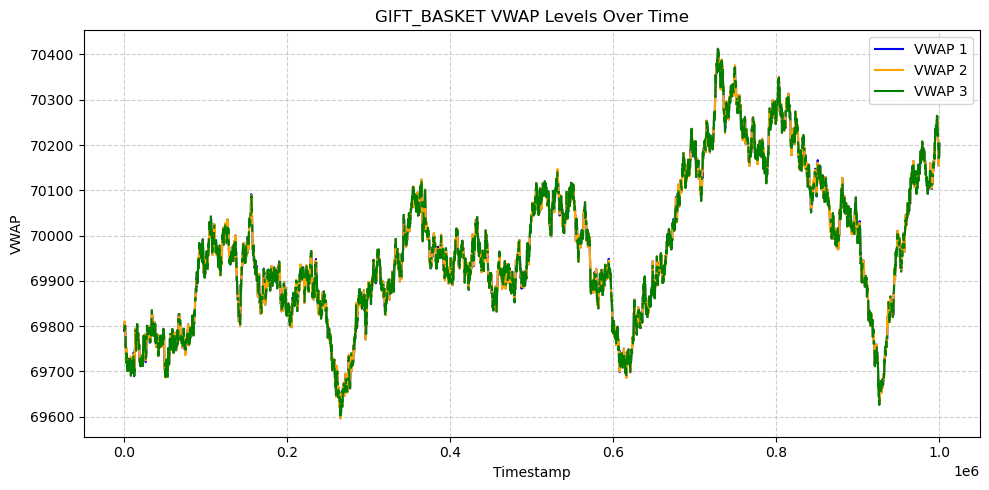


 VWAP values for COCONUT_COUPON:

0   timestamp      VWAP_1  VWAP_2  VWAP_3
2           0  581.500000     NaN     NaN
17        100  580.500000     NaN     NaN
24        200  581.500000     NaN     NaN
30        300  580.434211     NaN     NaN
37        400  578.500000     NaN     NaN
53        500  576.500000     NaN     NaN
60        600  576.000000     NaN     NaN
67        700  577.000000     NaN     NaN
74        800  577.500000     NaN     NaN
90        900  579.500000     NaN     NaN


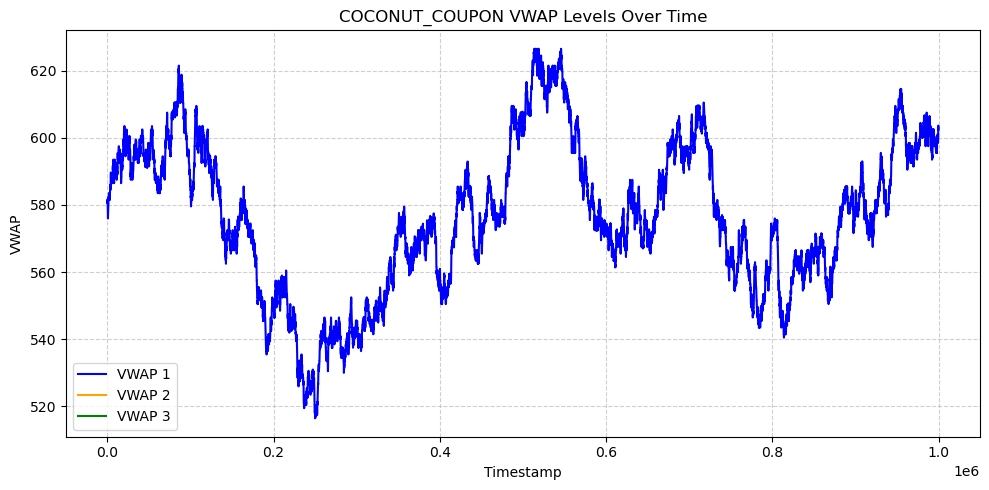


 VWAP values for CHOCOLATE:

0   timestamp       VWAP_1  VWAP_2  VWAP_3
3           0  7957.777108     NaN     NaN
12        100  7956.000000     NaN     NaN
25        200  7956.500000  7956.5     NaN
35        300  7956.292683     NaN     NaN
38        400  7957.233333     NaN     NaN
49        500  7956.500000  7956.5     NaN
61        600  7955.780899     NaN     NaN
71        700  7955.000000     NaN     NaN
75        800  7953.977492     NaN     NaN
85        900  7953.000000     NaN     NaN


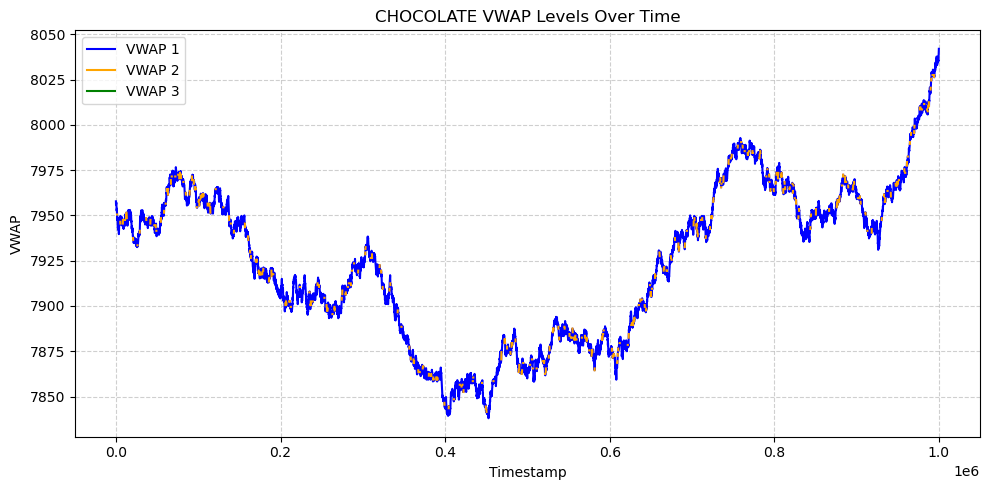


 VWAP values for AMETHYSTS:

0   timestamp        VWAP_1        VWAP_2   VWAP_3
4           0  10000.400000  10004.181818      NaN
10        100   9998.909091  10000.000000  10000.0
27        200  10000.000000  10000.000000      NaN
32        300  10000.000000  10000.000000      NaN
40        400  10000.000000           NaN      NaN
46        500  10003.000000  10004.379310      NaN
63        600  10000.000000  10000.000000      NaN
70        700  10000.000000  10000.000000      NaN
73        800  10000.000000  10000.000000      NaN
84        900  10000.000000           NaN      NaN


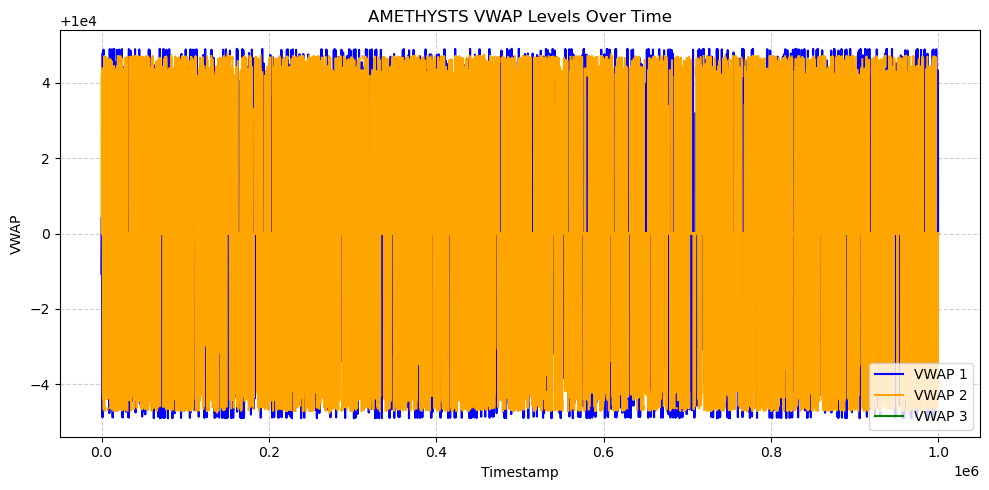


 VWAP values for ROSES:

0   timestamp        VWAP_1  VWAP_2  VWAP_3
5           0  13720.500000     NaN     NaN
16        100  13714.500000     NaN     NaN
19        200  13716.500000     NaN     NaN
29        300  13717.500000     NaN     NaN
41        400  13715.500000     NaN     NaN
52        500  13717.500000     NaN     NaN
56        600  13719.282609     NaN     NaN
65        700  13718.696203     NaN     NaN
78        800  13719.500000     NaN     NaN
88        900  13719.291262     NaN     NaN


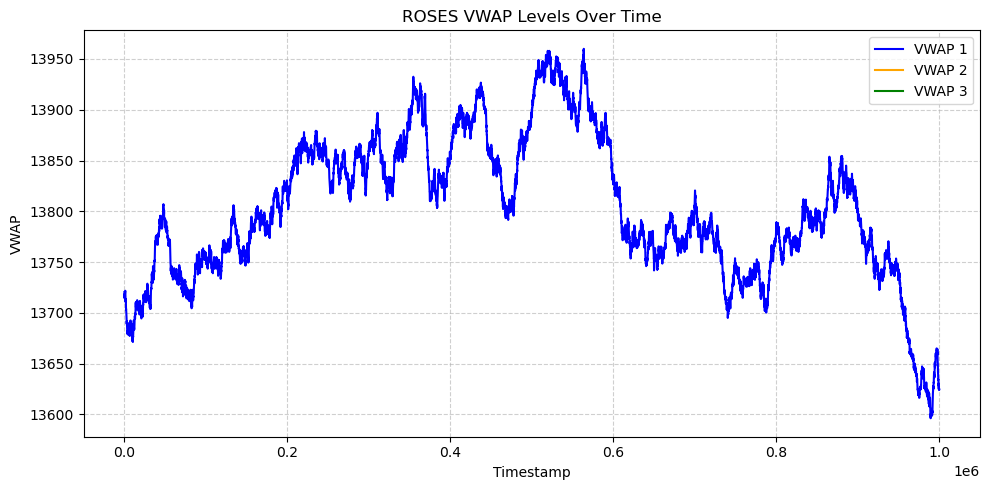


 VWAP values for STARFRUIT:

0   timestamp       VWAP_1    VWAP_2  VWAP_3
6           0  4874.000000       NaN     NaN
13        100  4871.454545       NaN     NaN
21        200  4877.538462       NaN     NaN
34        300  4871.375000       NaN     NaN
43        400  4874.500000       NaN     NaN
48        500  4875.571429  4874.375     NaN
55        600  4876.760000       NaN     NaN
69        700  4876.657143       NaN     NaN
77        800  4873.500000       NaN     NaN
83        900  4874.500000       NaN     NaN


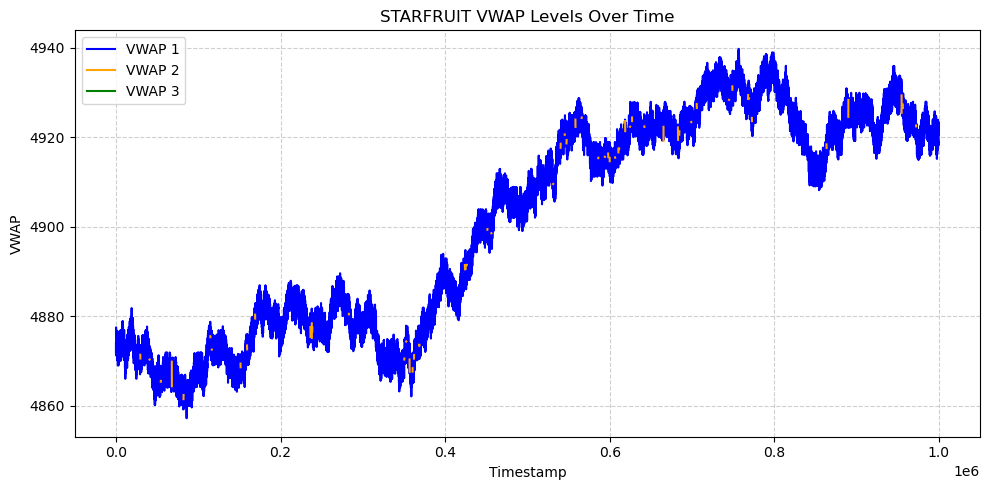


 VWAP values for STRAWBERRIES:

0   timestamp       VWAP_1  VWAP_2  VWAP_3
7           0  3979.000000     NaN     NaN
18        100  3978.799308     NaN     NaN
20        200  3978.244792     NaN     NaN
31        300  3978.500000     NaN     NaN
42        400  3978.000000     NaN     NaN
54        500  3977.267760     NaN     NaN
57        600  3978.000000     NaN     NaN
66        700  3978.720280     NaN     NaN
79        800  3978.748649     NaN     NaN
89        900  3978.000000     NaN     NaN


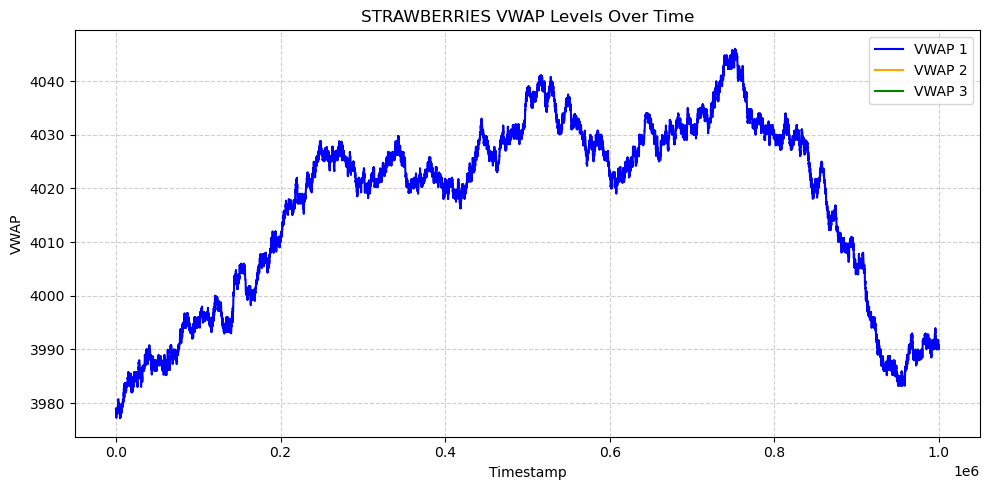


 VWAP values for COCONUT:

0   timestamp       VWAP_1  VWAP_2  VWAP_3
8           0  9862.500000  9862.5     NaN
15        100  9862.792727     NaN     NaN
22        200  9862.500000  9862.5     NaN
28        300  9862.812325     NaN     NaN
44        400  9861.500000  9861.5     NaN
51        500  9862.500000  9862.5     NaN
58        600  9863.223881     NaN     NaN
64        700  9861.480000  9861.5     NaN
80        800  9862.500000  9862.5     NaN
87        900  9863.035714     NaN     NaN


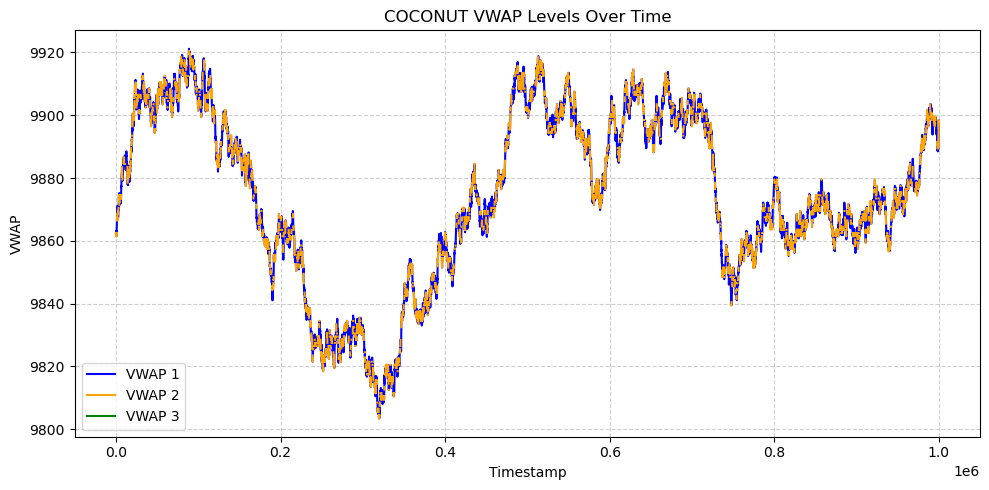


 VWAP values for ORCHIDS:

0   timestamp       VWAP_1    VWAP_2       VWAP_3
9           0  1088.500000  1088.500  1089.000000
11        100  1088.500000  1088.500  1088.500000
23        200  1088.500000  1088.500  1088.500000
33        300  1089.000000  1089.000  1089.000000
45        400  1091.000000  1091.000  1091.000000
47        500  1089.000000  1089.000  1089.000000
59        600  1090.000000  1090.000  1090.000000
68        700  1091.666667  1090.375  1102.072727
81        800  1090.000000  1090.000  1090.000000
82        900  1090.000000  1090.000  1090.000000


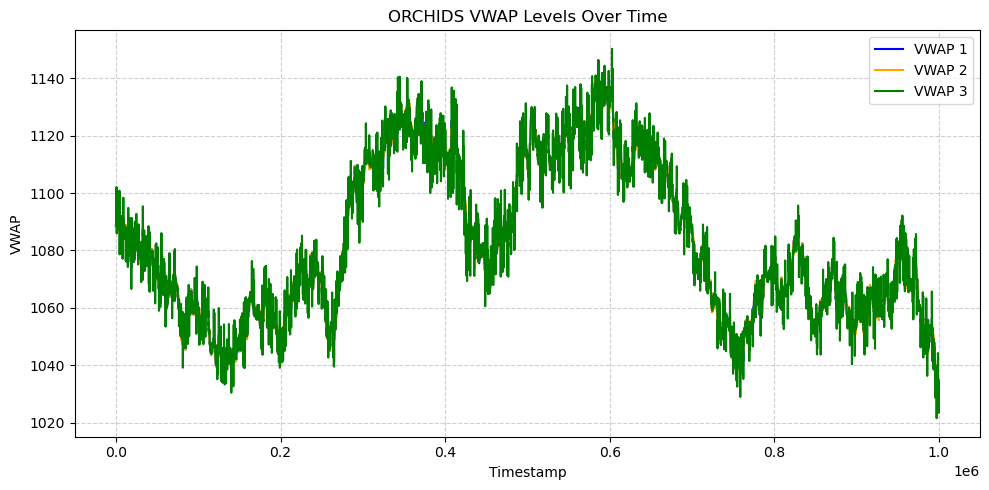

In [13]:
products = activity_logs_df['product'].unique()

cols = [
    'bid_price_1', 'ask_price_1', 'bid_volume_1', 'ask_volume_1',
    'bid_price_2', 'ask_price_2', 'bid_volume_2', 'ask_volume_2',
    'bid_price_3', 'ask_price_3', 'bid_volume_3', 'ask_volume_3',
    'timestamp'
]
activity_logs_df[cols] = activity_logs_df[cols].apply(pd.to_numeric, errors='coerce')

for product in products:
    df = activity_logs_df[activity_logs_df['product'] == product].copy()
    df = df.dropna(subset=['timestamp'])

    df['VWAP_1'] = (df['bid_price_1'] * df['bid_volume_1'] + df['ask_price_1'] * df['ask_volume_1']) / (df['bid_volume_1'] + df['ask_volume_1'])
    df['VWAP_2'] = (df['bid_price_2'] * df['bid_volume_2'] + df['ask_price_2'] * df['ask_volume_2']) / (df['bid_volume_2'] + df['ask_volume_2'])
    df['VWAP_3'] = (df['bid_price_3'] * df['bid_volume_3'] + df['ask_price_3'] * df['ask_volume_3']) / (df['bid_volume_3'] + df['ask_volume_3'])

    print(f"\n VWAP values for {product}:\n")
    print(df[['timestamp', 'VWAP_1', 'VWAP_2', 'VWAP_3']].head(10))

    plt.figure(figsize=(10, 5))
    plt.plot(df['timestamp'], df['VWAP_1'], label='VWAP 1', color='blue')
    plt.plot(df['timestamp'], df['VWAP_2'], label='VWAP 2', color='orange')
    plt.plot(df['timestamp'], df['VWAP_3'], label='VWAP 3', color='green')
    plt.title(f'{product} VWAP Levels Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('VWAP')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


**GIFT_BASKET** and **COCONUT** have clearly defined VWAPs across levels 1–3, showing consistent structure and price-following behavior, making them suitable for VWAP-based strategies.

**ORCHIDS** shows very wide VWAP Level 3, suggesting large spreads and higher uncertainty or lower liquidity at deeper order book levels.

For most other products like **STRAWBERRIES**, **STARFRUIT**, and **ROSES**, only VWAP Level 1 is stable and consistently available, limiting the depth based strategy design.

**AMETHYSTS** appears to have data issues or anomalies with extremely volatile and erratic VWAP lines.

                      VWAP_1        VWAP_2        VWAP_3
Product                                                 
GIFT_BASKET     69969.201343  69969.222412  69971.607774
COCONUT_COUPON    576.420905           NaN           NaN
CHOCOLATE        7923.865740   7924.963865           NaN
AMETHYSTS        9999.995435  10000.030829  10000.000000
ROSES           13802.194787           NaN           NaN
STARFRUIT        4901.077073   4900.543554           NaN
STRAWBERRIES     4016.875956           NaN           NaN
COCONUT          9874.337366   9874.075245           NaN
ORCHIDS          1082.870176   1082.876253   1082.886127


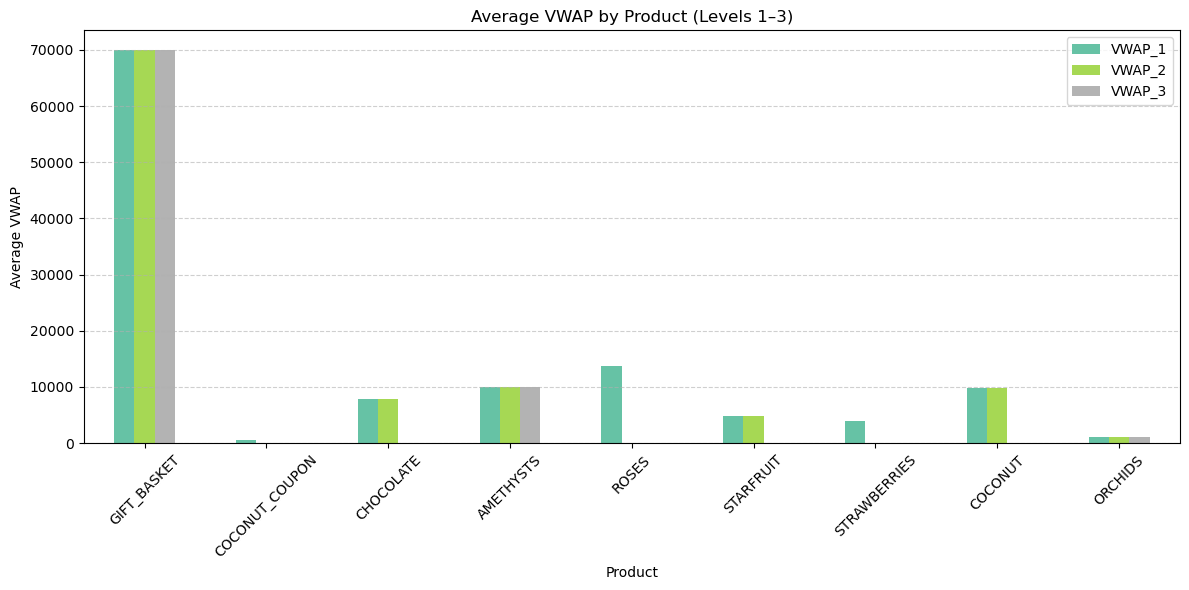

In [12]:
# Average vwap by each product
product_list = activity_logs_df['product'].unique()
vwap_summary = []

for product in product_list:
    df = activity_logs_df[activity_logs_df['product'] == product].copy()
    cols = [
        'bid_price_1', 'ask_price_1', 'bid_volume_1', 'ask_volume_1',
        'bid_price_2', 'ask_price_2', 'bid_volume_2', 'ask_volume_2',
        'bid_price_3', 'ask_price_3', 'bid_volume_3', 'ask_volume_3'
    ]
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
    
    # VWAP 1
    vwap_1 = (df['bid_price_1'] * df['bid_volume_1'] + df['ask_price_1'] * df['ask_volume_1']) / (df['bid_volume_1'] + df['ask_volume_1'])
    # VWAP 2
    vwap_2 = (df['bid_price_2'] * df['bid_volume_2'] + df['ask_price_2'] * df['ask_volume_2']) / (df['bid_volume_2'] + df['ask_volume_2'])
    # VWAP 3
    vwap_3 = (df['bid_price_3'] * df['bid_volume_3'] + df['ask_price_3'] * df['ask_volume_3']) / (df['bid_volume_3'] + df['ask_volume_3'])

    vwap_summary.append({
        'Product': product,
        'VWAP_1': vwap_1.mean(),
        'VWAP_2': vwap_2.mean(),
        'VWAP_3': vwap_3.mean()
    })

vwap_df = pd.DataFrame(vwap_summary)
vwap_df = vwap_df.set_index('Product')
print(vwap_df.head(10))

vwap_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Average VWAP by Product (Levels 1–3)')
plt.xlabel('Product')
plt.ylabel('Average VWAP')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


The chart shows that **GIFT_BASKET** has the highest VWAP across all three levels, while **COCONUT_COUPON** and **ORCHIDS** have the lowest. Products like **ROSES** and **AMETHYSTS** show relative high VWAPs, suggesting higher price benchmarks compared to other assets.

Based on the challenge objective：to analyze and develop trading strategies from IMC trading rounds.

After reviewing the data analysis above, I think **GIFT_BASKET** stands out as the most suitable product choice. It demonstrates:

-High cumulative profitability,

-Clearly structured mid-price and VWAP trends,

-Manageable bid-ask spreads,

-Active.

So, I made a basic counter party analysis on **GIFT_BASKET** .

## Basic Counterparty Analysis for GIFT_BASKET

In [15]:
gift_trades = trades_df[trades_df['symbol'] == 'GIFT_BASKET'].copy()

In [17]:
# Determine whether SUBMISSION is a buyer or a seller
def identify_role(row):
    if row['buyer'] == 'SUBMISSION':
        return 'BUY'
    elif row['seller'] == 'SUBMISSION':
        return 'SELL'
    else:
        return 'OTHER'

# Define Counter party
def get_counter_party(row):
    if row["buyer"] == "SUBMISSION":
        return row["seller"]
    elif row["seller"] == "SUBMISSION":
        return row["buyer"]
    else:
        return None

gift_trades["role"] = gift_trades.apply(identify_role, axis=1)
gift_trades["counter_party"] = gift_trades.apply(get_counter_party, axis=1)

gift_trades = gift_trades[gift_trades["role"].isin(["BUY", "SELL"])]
gift_trades["trade_value"] = gift_trades["price"] * gift_trades["quantity"]

summary = gift_trades.groupby("counter_party").agg(
    trade_count=("price", "count"),
    total_quantity=("quantity", "sum"),
    average_price=("price", "mean"),
    total_value=("trade_value", "sum")
).reset_index()

print(summary)


  counter_party  trade_count  total_quantity  average_price  total_value
0       Rhianna            6              22   69926.666667      1538634
1          Ruby            4              31   70015.250000      2170485
2        Vinnie          208             382   69961.533654     26725821
3      Vladimir          102            1383   69952.852941     96745478


In [18]:
gift_logs = activity_logs_df[activity_logs_df['product'] == 'GIFT_BASKET'].copy()
gift_logs['timestamp'] = pd.to_numeric(gift_logs['timestamp'], errors='coerce')
gift_logs['profit_and_loss'] = pd.to_numeric(gift_logs['profit_and_loss'], errors='coerce')

#Pnl
merged = pd.merge(gift_trades, gift_logs[['timestamp', 'profit_and_loss']], on='timestamp', how='left')
pnl_counterparty = merged.groupby('counter_party')['profit_and_loss'].sum().reset_index()
print(pnl_counterparty)


  counter_party  profit_and_loss
0       Rhianna     2.625930e+05
1          Ruby     1.399782e+05
2        Vinnie     9.835253e+06
3      Vladimir     4.520025e+06


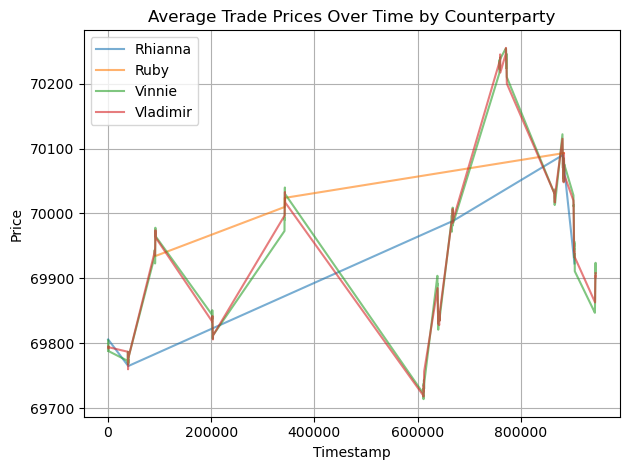

In [19]:
# Average price trend
for counter_party in summary['counter_party']:  
    df = gift_trades[gift_trades['counter_party'] == counter_party]
    plt.plot(df['timestamp'], df['price'], label= counter_party, alpha=0.6)

plt.title("Average Trade Prices Over Time by Counterparty")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Vinnie** is the **most active** counterparty and has brought the highest profit, making them the top target for strategic trading. **Vladimir** also contributed significantly to gains and should be closely monitored.

**Vinnie** as a counterparty with a higher average trade price (69961.5) and generated the highest profit (9.8 million). This suggests that Vinnie tends to buy at elevated prices, possibly acting as a momentum or trend follower.
Like: When Vinnie is the buyer and the price is above VWAP by 1% or more, it's a good opportunity to sell to him for profit.

**Vladimir** was involved in more frequent trades (102) and also contributed significantly profits (4.5 million), though his average trade price is slightly lower. This behavior indicates that Vladimir may frequently sell at a related lower prices
Like: When Vladimir is the seller and his price is below VWAP by 1%, consider buying from him to capture value or arbitrage potential.

## Simple strategy

In [61]:
df = activity_logs_df[activity_logs_df["product"] == "GIFT_BASKET"].copy()

cols = [
    'bid_price_1', 'ask_price_1', 'bid_volume_1', 'ask_volume_1',
    'bid_price_2', 'ask_price_2', 'bid_volume_2', 'ask_volume_2',
    'bid_price_3', 'ask_price_3', 'bid_volume_3', 'ask_volume_3',
    'mid_price'
]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=['mid_price']) # Assume mid_price is used as the current price

# Calculate VWAP
df["vwap_1"] = (df["bid_price_1"] * df["bid_volume_1"] + df["ask_price_1"] * df["ask_volume_1"]) / (df["bid_volume_1"] + df["ask_volume_1"])
df["vwap_2"] = (df["bid_price_2"] * df["bid_volume_2"] + df["ask_price_2"] * df["ask_volume_2"]) / (df["bid_volume_2"] + df["ask_volume_2"])
df["vwap_3"] = (df["bid_price_3"] * df["bid_volume_3"] + df["ask_price_3"] * df["ask_volume_3"]) / (df["bid_volume_3"] + df["ask_volume_3"])

# Mean Reversion
slippage = 0.000001
window = 50
df["vwap_avg"] = df[["vwap_1", "vwap_2", "vwap_3"]].mean(axis=1)
df["vwap_avg_rolling"] = df["vwap_avg"].rolling(window=window, min_periods=1).mean()
df["mid_price_rolling"] = df["mid_price"].rolling(window=window, min_periods=1).mean()  

#Trading Action
df["action"] = np.where(
    df["mid_price_rolling"] > df["vwap_avg_rolling"] * (1 + slippage), "SELL",
    np.where(df["mid_price_rolling"] < df["vwap_avg_rolling"] * (1 - slippage), "BUY", "HOLD")
)
signal_df = df[["timestamp", "mid_price_rolling", "vwap_avg_rolling", "action"]].copy()
signal_df = signal_df[signal_df["action"] != "HOLD"]
print(signal_df)



0      timestamp  mid_price_rolling  vwap_avg_rolling action
62           600       69799.928571      69799.824299   SELL
72           700       69799.937500      69799.825428   SELL
76           800       69799.500000      69799.381862   SELL
86           900       69799.400000      69799.293676   SELL
99          1000       69798.863636      69798.766978   SELL
...          ...                ...               ...    ...
89569     995200       70155.270000      70155.118384   SELL
89582     995300       70157.660000      70157.564824   SELL
89594     995400       70159.920000      70159.824824   SELL
89604     995500       70162.240000      70162.144824   SELL
89607     995600       70164.630000      70164.531490   SELL

[1550 rows x 4 columns]


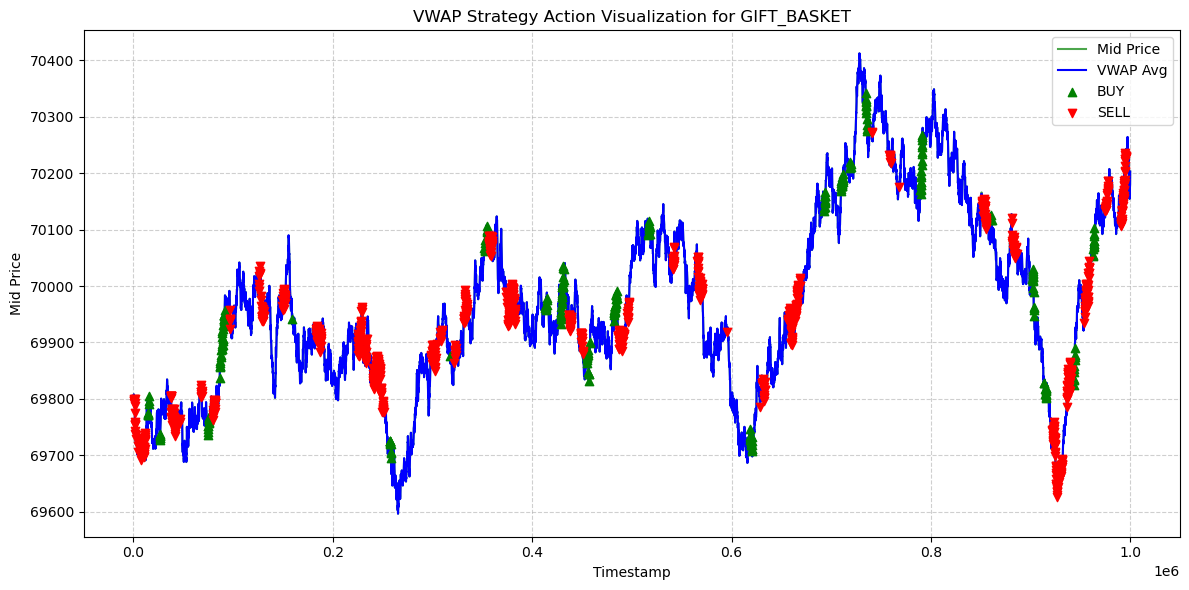

In [53]:
plt.figure(figsize=(12, 6))

# Price Line
plt.plot(df["timestamp"], df["mid_price"], label="Mid Price", color="green", alpha=0.7)
plt.plot(df["timestamp"], df["vwap_avg"], label="VWAP Avg", color="blue", linewidth=1.5)

# BUY / SELL 
buy_signals = df[df["action"] == "BUY"]
sell_signals = df[df["action"] == "SELL"]

plt.scatter(buy_signals["timestamp"], buy_signals["mid_price"], marker="^", color="green", label="BUY", zorder=5)
plt.scatter(sell_signals["timestamp"], sell_signals["mid_price"], marker="v", color="red", label="SELL", zorder=5)

plt.title("VWAP Strategy Action Visualization for GIFT_BASKET")
plt.xlabel("Timestamp")
plt.ylabel("Mid Price")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Basic Optimizing

0      timestamp  mid_price      vwap_avg final_action
1915       21200    69717.5  69717.500000         SELL
2238       24800    69762.0  69762.700000          BUY
2928       32500    69778.5  69778.500000          BUY
3108       34500    69815.5  69816.165789          BUY
4786       53100    69703.5  69703.500000         SELL
7802       86600    69837.5  69840.266061          BUY
10412     115600    69958.5  69958.500000         SELL
18307     203400    69799.5  69799.500000         SELL
18557     206100    69848.0  69847.770833         SELL
21357     237200    69876.5  69874.292157         SELL
21608     240000    69837.5  69835.421053         SELL
23590     262100    69645.5  69645.500000         SELL
24349     270500    69666.5  69666.500000          BUY
24438     271500    69694.5  69694.941919          BUY
24667     274000    69688.5  69688.721633          BUY
26832     298100    69876.5  69873.256410         SELL
28907     321100    69864.5  69862.782609         SELL
30265     

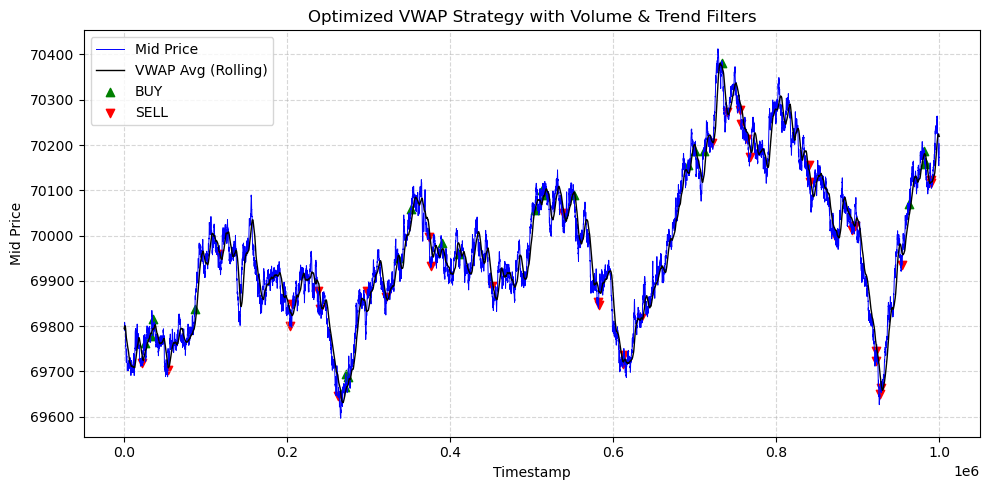

In [104]:
# Dynamic Slippage
df["volatility"] = df["mid_price"].rolling(window=window).std()
df["dynamic_slippage"] = 0.002 * df["volatility"] / df["mid_price"]

# Generating Signals
df["action"] = np.where(
    df["mid_price_rolling"] > df["vwap_avg_rolling"] * (1 + df["dynamic_slippage"]), "SELL",
    np.where(df["mid_price_rolling"] < df["vwap_avg_rolling"] * (1 - df["dynamic_slippage"]), "BUY", "HOLD")
)

# Signals and Volume Filter
df["cooldown"] = df["action"].ne(df["action"].shift())
df["action_filtered"] = np.where(df["cooldown"], df["action"], "HOLD")

df["volume"] = df["bid_volume_1"] + df["ask_volume_1"]
volume_threshold = df["volume"].rolling(window=window).mean()
df["action_volume_filtered"] = np.where(
    (df["volume"] > volume_threshold) & (df["action_filtered"] != "HOLD"),
    df["action_filtered"],
    "HOLD"
)

# MA crossover
df["ma_short"] = df["mid_price"].rolling(20).mean()
df["ma_long"] = df["mid_price"].rolling(100).mean()
df["trend"] = np.where(df["ma_short"] > df["ma_long"], "UP", "DOWN")
df["final_action"] = np.where(
    (df["action_volume_filtered"] == "BUY") & (df["trend"] == "UP"), "BUY",
    np.where((df["action_volume_filtered"] == "SELL") & (df["trend"] == "DOWN"), "SELL", "HOLD")
)


signals = df[df["final_action"] != "HOLD"]
print(signals[["timestamp", "mid_price", "vwap_avg", "final_action"]].head(20))


plt.figure(figsize=(10, 5))
plt.plot(df["timestamp"], df["mid_price"], label="Mid Price", color="blue", linewidth=0.7)
plt.plot(df["timestamp"], df["vwap_avg_rolling"], label="VWAP Avg (Rolling)", color="black", linewidth=1)

buy_signals = df[df["final_action"] == "BUY"]
sell_signals = df[df["final_action"] == "SELL"]

plt.scatter(buy_signals["timestamp"], buy_signals["mid_price"], marker="^", color="green", label="BUY")
plt.scatter(sell_signals["timestamp"], sell_signals["mid_price"], marker="v", color="red", label="SELL")

plt.title("Optimized VWAP Strategy with Volume & Trend Filters")
plt.xlabel("Timestamp")
plt.ylabel("Mid Price")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Basic Backtesting

In [115]:
position = None        
entry_price = 0        
trades = []            

for idx, row in df[df["final_action"].isin(["BUY", "SELL"])].iterrows():
    action = row["final_action"]
    price = row["mid_price"]

    if action == "BUY" and position is None:
        position = "LONG"
        entry_price = price

    elif action == "SELL" and position == "LONG":
        pnl = price - entry_price
        trades.append(pnl)
        position = None  

trade_log = pd.DataFrame(trades, columns=["pnl"])

# Performances
def evaluate_strategy_performance(trade_log):
    pnl_series = trade_log["pnl"]
    result = {}
    result['Total Trades'] = len(pnl_series)
    result['Total PnL'] = pnl_series.sum()
    result['Win Rate (%)'] = round((pnl_series > 0).mean() * 100, 2)
    result['Average PnL'] = pnl_series.mean()
    result['Max Drawdown'] = (pnl_series.cumsum().cummax() - pnl_series.cumsum()).max()
    
    total_profit = pnl_series[pnl_series > 0].sum()
    total_loss = abs(pnl_series[pnl_series < 0].sum())
    result['Profit Factor'] = round(total_profit / total_loss, 3) if total_loss != 0 else np.inf
    
    win_rate = (pnl_series > 0).mean()
    avg_gain = pnl_series[pnl_series > 0].mean() if not pnl_series[pnl_series > 0].empty else 0
    avg_loss = abs(pnl_series[pnl_series < 0].mean()) if not pnl_series[pnl_series < 0].empty else 0
    result['Expectancy'] = win_rate * avg_gain - (1 - win_rate) * avg_loss

    if pnl_series.std() != 0:
        result['Sharpe Ratio'] = round(pnl_series.mean() / pnl_series.std(), 3)
    else:
        result['Sharpe Ratio'] = np.nan

    return pd.DataFrame(result, index=[0])

performance_df = evaluate_strategy_performance(trade_log)
print(performance_df)


   Total Trades  Total PnL  Win Rate (%)  Average PnL  Max Drawdown  \
0            10      -31.5          50.0        -3.15         402.0   

   Profit Factor  Expectancy  Sharpe Ratio  
0          0.938       -3.15        -0.025  
